# N1 Health Data Challenge  
#### Completed by Winnie Lau

This notebook contains code and visualizations for the N1 Health Data Challenge. The goal is to identify where a food access program should be implemented, along with the potential impacts of its implementation. The [Food Atlas by the FDA](https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads) was analyzed, and five tiers of need were identified across the country:

- **Tier 1** contains 182 counties and 26.03 million people, requiring urgent intervention.  
- **Tier 2** contains 128 counties and 13.2 million people, focusing on counties with large populations with low access to food.  
- **Tier 3** contains 128 counties and 1.23 million people with high low-access prevalence, focusing on rural communities with low access to food.  
- **Tier 4** contains 330 counties and 7.78 million people, who are moderately in need and should be monitored.  
- **Tier 5** contains the remaining counties.  

With over 40 million people in the first three tiers, a projected program participation rate of 50–85% (on par with SNAP participation in 2022 for different groups, according to the USDA) would mean 20–34 million people assisted. The population groups most impacted by this program are low-income individuals, children, and seniors. One detail to note is that in Tier 3, the proportion of American Indian/Alaska Natives is comparatively higher than in the other tiers.  

The projected impacts of this program include reduced food insecurity, increased economic stability for households, and healthier diets, which can lead to improved health outcomes due to greater food availability.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


import sqlite3

import seaborn as sns

import plotly.express as px
from urllib.request import urlopen
import json

from IPython.display import Image, display
import plotly.io as pio

## 1. Importing the Database

The provided database with the `access` dataset was imported using `sqlite3`. 

In [2]:
database_path = './challenge.db_new/challenge.db'

connection = sqlite3.connect(database_path)

df_access = pd.read_sql_query('SELECT * FROM access', connection)
connection.close()

df_access.head()

,index,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990


In [3]:
print(df_access.shape)
print(df_access.columns)

(3143, 45)
Index(['index', 'FIPS', 'State', 'County', 'LACCESS_POP10', 'LACCESS_POP15',
       'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15',
       'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15',
       'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15', 'LACCESS_MULTIR15',
    

In [4]:
df_access.describe()

,index,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
count,3143.000000,3143.000000,3143.000000,3124.000000,3.117000e+03,3143.000000,3124.000000,3143.000000,3123.000000,3.115000e+03,...,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000
mean,1571.000000,30390.411709,20156.653242,19287.747386,7.180008e+03,23.559330,23.084470,5551.776559,5833.959524,7.318957e+03,...,2326.081648,2.021269,695.064178,0.249350,230.259498,0.804746,32.204247,0.019207,1290.799156,1.154542
std,907.450274,15164.717720,51308.865791,47803.525596,3.955676e+05,20.250176,19.602745,13862.922934,13989.348252,4.004692e+05,...,12159.928409,5.030497,3466.438554,0.693856,1387.887687,4.835109,435.841952,0.134887,5414.425184,1.864479
min,0.000000,1001.000000,0.000000,0.000000,-1.000000e+02,0.000000,0.000000,0.000000,0.000000,-1.000000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,785.500000,18178.000000,1661.076794,1631.358726,-1.091343e+01,10.847099,10.927326,592.983070,608.235919,-1.232638e+01,...,31.131894,0.197446,3.328667,0.027088,5.274117,0.026997,0.000000,0.000000,33.382261,0.221558
50%,1571.000000,29177.000000,4097.827186,4131.174278,-6.239322e-02,19.685956,19.200682,1500.780036,1636.858816,3.486028e+00,...,136.051404,0.579669,16.473665,0.085588,20.850829,0.072033,1.000000,0.003242,132.098182,0.572597
75%,2356.500000,45082.000000,12954.123206,13119.029389,7.262080e+00,29.581054,28.862231,4591.067541,4859.016156,2.352342e+01,...,874.891533,1.673132,130.916653,0.249311,101.353615,0.186646,7.107201,0.013054,658.924526,1.318699
max,3142.000000,56045.000000,886068.668386,740267.412661,2.208376e+07,100.000001,100.000001,292541.789025,259479.516033,2.234893e+07,...,263440.500070,79.323968,76998.348562,25.087551,40350.800429,83.844210,21387.063061,4.469546,115781.021513,27.120652


In [5]:
print(df_access.columns)

Index(['index', 'FIPS', 'State', 'County', 'LACCESS_POP10', 'LACCESS_POP15',
       'PCH_LACCESS_POP_10_15', 'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
       'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
       'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15', 'LACCESS_HHNV10',
       'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15', 'PCT_LACCESS_HHNV10',
       'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
       'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
       'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS10',
       'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
       'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15',
       'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15',
       'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15', 'LACCESS_MULTIR15',
       'PCT_LAC

In [6]:
total_population_affected = df_access['LACCESS_POP15'].sum()

print('Total population with low access: ', total_population_affected)


Total population with low access:  60254922.83399637


## 2. Cleaning up the data

This database contains 3,143 rows and 45 features related to population counts and percentages of different groups with low access. For each category, the data for 2010, 2015, and the percent change between the two years are provided. For the purposes of this notebook, the features from 2015 were selected to utilize the most recent data. Future analysis could be conducted to explore the change in low access between 2010 and 2015, highlighting severity based on whether the need increased or decreased between 2010 and 2015. 

The dataframe was cleaned and prepared for analysis by:
- Dropping missing or `NaN` values
- Removing duplicate rows
- Selecting features to focus on data from 2015
- Grouping columns by type (e.g., count, percentage, race, population groups)

In [7]:
def clean_data(df):

    print('Number of NA Values before dropping NA: ', df.isna().sum().sum())
    df = df.dropna()
    print('Number of NA Values after dropping NA: ', df.isna().sum().sum())

    duplicate_rows = df.duplicated(keep=False)
    print('Duplicated rows: ', duplicate_rows.sum())
    display(df[duplicate_rows])

    df = df.copy()

    return df

In [8]:
df_access = clean_data(df_access)

Number of NA Values before dropping NA:  588
Number of NA Values after dropping NA:  0
Duplicated rows:  0


,index,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15


In [9]:
df_access = df_access.loc[:, ~df_access.columns.str.contains("10")]
print(df_access.columns)

Index(['index', 'FIPS', 'State', 'County', 'LACCESS_POP15',
       'PCT_LACCESS_POP15', 'LACCESS_LOWI15', 'PCT_LACCESS_LOWI15',
       'LACCESS_HHNV15', 'PCT_LACCESS_HHNV15', 'LACCESS_SNAP15',
       'PCT_LACCESS_SNAP15', 'LACCESS_CHILD15', 'PCT_LACCESS_CHILD15',
       'LACCESS_SENIORS15', 'PCT_LACCESS_SENIORS15', 'LACCESS_WHITE15',
       'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
       'LACCESS_HISP15', 'PCT_LACCESS_HISP15', 'LACCESS_NHASIAN15',
       'PCT_LACCESS_NHASIAN15', 'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15',
       'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15', 'LACCESS_MULTIR15',
       'PCT_LACCESS_MULTIR15'],
      dtype='object')


In [10]:
# Identification Columns
identifier_cols = ['index', 'FIPS', 'State', 'County']

# Population count with low access
pop_access_col = "LACCESS_POP15"

# Percentage of people with low access
pct_access_col = "PCT_LACCESS_POP15"

# Vulnerable populations split into counts and percentages: low income, household with no access to vehicles, children, and seniors 
vulnerable_cols_count = [
    "LACCESS_LOWI15",
    "LACCESS_HHNV15",
    "LACCESS_CHILD15",
    "LACCESS_SENIORS15"
]

vulnerable_cols = [
    "PCT_LACCESS_LOWI15",
    "PCT_LACCESS_HHNV15",
    "PCT_LACCESS_CHILD15",
    "PCT_LACCESS_SENIORS15"
]

# Population counts and percentages of ethnicities/race
demographic_cols_count = [
    'LACCESS_WHITE15',
    'LACCESS_BLACK15',
    'LACCESS_HISP15',       # Hispanic can be considered separately as it is an ethnicity, not a race, and may overlap with other groups.
    'LACCESS_NHASIAN15', 
    'LACCESS_NHNA15',
    'LACCESS_NHPI15',
    'LACCESS_MULTIR15'
]

demographic_cols = [
    'PCT_LACCESS_WHITE15',
    'PCT_LACCESS_BLACK15',
    'PCT_LACCESS_HISP15', 
    'PCT_LACCESS_NHASIAN15', 
    'PCT_LACCESS_NHNA15',
    'PCT_LACCESS_NHPI15',
    'PCT_LACCESS_MULTIR15'
]


## 3. Determining the Priority Score and Ranking

To determine which counties should be prioritized, a priority score was calculated.  

Principal Component Analysis (PCA) was not used in order to preserve the interpretability of the original features and to clearly identify which features were most important. Clustering algorithms such as KMeans, hierarchical clustering, and spectral clustering were considered, but using a priority score function was the simplest approach, allowing a direct calculation of each county's need.


### Scaling the Features

Each feature was normalized using a modified z-score to account for outliers, calculated as:
$$
z = \frac{x - median(x)}{IQR}
$$

This z-score is defined as the difference between the value and the median, divided by the interquartile range.


In [11]:
def robust_zscore(s):
    med = s.median()
    iqr = s.quantile(0.75) - s.quantile(0.25)
    return (s - med) / (iqr if iqr != 0 else 1)

def minmax(s):
    return (s - s.min()) / (s.max() - s.min())


### Calculating Need

The following equations are used to calculate the indices:
$$
I_{access} = z(PCT\_LACCESS\_POP15)
$$

$$
I_{vuln} = \frac{1}{4} \big(z(LOWI) + z(HHNV) + z(CHILD) + z(SENIORS)\big)
$$

Here, $I_{access}$ represents an index based on the percentage of the population with low access, and $I_{vuln}$ represents an index based on the average z-score of vulnerable populations. The `minmax()` function then rescales each variable to produce $I_{access, mm}$ and $I_{vuln, mm}$ values between 0 and 1.  

The two indices are combined into the overall Need index:
$$
N = \frac{1}{2} \big(I_{access, mm} + I_{vuln, mm}\big)
$$


In [12]:
def compute_need_and_impact(df):

    df = df.copy()

    # Access Index
    df["I_access"] = robust_zscore(df[pct_access_col])

    # Vulnerability Index
    df["I_vuln"] = df[vulnerable_cols].apply(robust_zscore).mean(axis=1)

    df["I_access_mm"] = minmax(df["I_access"])
    df["I_vuln_mm"]   = minmax(df["I_vuln"])

    df["Need_Index"] = 0.5 * df["I_access_mm"] + 0.5 * df["I_vuln_mm"]

    df["Impact_mm"] = df[pop_access_col] / df[pop_access_col].max()


    return df

### Priority Index

Using the number of people with low access in each county ($P$), the Priority Index is calculated as:
$$
\text{Priority Index} = P^{\alpha} \cdot N^{1 - \alpha}
$$

where $\alpha$ is a tunable parameter between 0 and 1 that balances prioritization between large populations and high percentages of vulnerable populations. In this notebook, $\alpha = 0.7$ and $\alpha = 0.25$ were used to represent prioritization based on high populations ($P_{pop}$) and high percentages ($P_{pct}$), respectively.  

Each county was then ranked from highest to lowest priority score for each value of $\alpha$.


In [13]:
def compute_alpha_ranks(df, alpha_pop, alpha_rural):

    df = df.copy()

    df["priority_score_pop"] = (
        df["Impact_mm"] ** alpha_pop
        * df["Need_Index"] ** (1 - alpha_pop)
    )

    df["priority_score_rural"] = (
        df["Impact_mm"] ** alpha_rural
        * df["Need_Index"] ** (1 - alpha_rural)
    )

    df["rank_pop"] = df["priority_score_pop"].rank(
        ascending=False, method="min", pct=True
    )

    df["rank_rural"] = df["priority_score_rural"].rank(
        ascending=False, method="min", pct=True
    )

    # Display top 10 counties for each alpha

    # For alpha_pop = 0.7
    print('Top Five counties based on population: \n', df.sort_values("priority_score_pop", ascending=False).head(5)[
        ["State", "County", "Need_Index", pop_access_col, "priority_score_pop"]
    ])

    print('\n')

    # For alpha_rural = 0.25
    print('Top Five counties based on percentage: \n', df.sort_values("priority_score_rural", ascending=False).head(5)[
        ["State", "County", "Need_Index", pop_access_col, "priority_score_rural"]
    ])

    return df

## 4. Assigning Tiers

To define the different tiers based on the rankings determined above, two cutoff points (the top 10% and top 30%) were used.

- **Tier 1** contains counties in the top 10% of both $P_{pop}$ and $P_{pct}$.  
- **Tier 2** contains counties in the top 10% of $P_{pop}$ only.  
- **Tier 3** contains counties in the top 10% of $P_{pct}$ only.  
- **Tier 4** contains counties in the top 30% of both $P_{pop}$ and $P_{pct}$.  
- **Tier 5** contains all remaining counties.


In [14]:
def compute_tiers(df, cutoff_1 = 0.1, cutoff_2 = 0.3):

    df = df.copy()

    pop10 = df["rank_pop"] <= cutoff_1
    rur10 = df["rank_rural"] <= cutoff_1

    pop30 = df["rank_pop"] <= cutoff_2
    rur30 = df["rank_rural"] <= cutoff_2
    
    # Assign tiers
    df["Tier"] = 5  

    df.loc[pop10 & rur10, "Tier"] = 1
    df.loc[pop10 & ~rur10, "Tier"] = 2
    df.loc[~pop10 & rur10, "Tier"] = 3

    df.loc[(df["Tier"] == 5) & pop30 & rur30, "Tier"] = 4

    return df


## 5. Visualizing the Tiers

A map was plotted showing all counties and their tier assignments using the FIPS codes and GeoJSON data.

In [ ]:
def county_map(df, labels, colors, continuous = False):
    df = df.copy()
    df['FIPS'] = df['FIPS'].astype(str).str.zfill(5)
    df[labels] = df[labels].astype(str)  # convert to string for Plotly discrete colors

    tiers = sorted(df[labels].dropna().unique(), key=lambda x: int(x))
    n_tiers = len(tiers)

    if n_tiers > len(colors):
        raise ValueError(
            f"Not enough colors provided ({len(colors)}) "
            f"for {n_tiers} tiers."
        )
    
    colors_hex = [mcolors.to_hex(c) for c in colors]
    color_map = dict(zip(tiers, colors_hex))

    # Load the county boundaries GeoJSON data
    # This GeoJSON file contains the geometry for all US counties and their FIPS codes
    with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
        counties_geojson = json.load(response)

    fig = px.choropleth(
        df,
        geojson=counties_geojson,
        locations="FIPS",
        color=labels,
        scope="usa",
        color_discrete_map=color_map,
        category_orders={labels: tiers},
        title="Priority Tiers by County",
        labels={labels: "Tier"}
    )

    fig.update_layout(
        margin={"r": 0, "t": 40, "l": 0, "b": 0}
    )
    fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})

    # Save as PNG and display in the cell
    county_map_png = pio.to_image(fig, format='png', scale=2)
    display(Image(county_map_png))

    with open("./Plots/county_map_by_tier.png", "wb") as f:
        f.write(county_map_png)
    
    # Use f.g.show() for interactive county map
    # fig.show()


In [16]:
# Function to calculate priority score, determine tier, and visualize with the county map

def calculate_priority(df, alpha_pop, alpha_rural, cutoff_1, cutoff_2):

    df = compute_need_and_impact(df)
    df = compute_alpha_ranks(df, alpha_pop, alpha_rural)
    df = compute_tiers(df, cutoff_1, cutoff_2)

    colors = [
        "darkred",      # Tier 1
        "orangered",    # Tier 2
        "orange",       # Tier 3
        "gold",         # Tier 4
        "lightgray"     # Tier 5
    ]

    county_map(df, labels="Tier", colors=colors)

    return df

Top Five counties based on population: 
      State          County  Need_Index  LACCESS_POP15  priority_score_pop
2623    TX          Harris    0.128971  740267.412661            0.540938
2537    TX           Bexar    0.195320  451601.664033            0.433492
2742    TX         Tarrant    0.181286  463702.839418            0.431822
221     CA  San Bernardino    0.154883  433153.412546            0.392716
218     CA       Riverside    0.146073  437849.237236            0.388800


Top Five counties based on percentage: 
      State    County  Need_Index  LACCESS_POP15  priority_score_rural
96      AZ    Apache    0.603691   50446.814137              0.349923
1788    NJ     Ocean    0.325001  248325.574735              0.327583
70      AK    Bethel    0.802678   11504.863490              0.299419
1812    NM  McKinley    0.508701   43211.250845              0.296073
2630    TX   Hidalgo    0.274981  269110.460682              0.294858


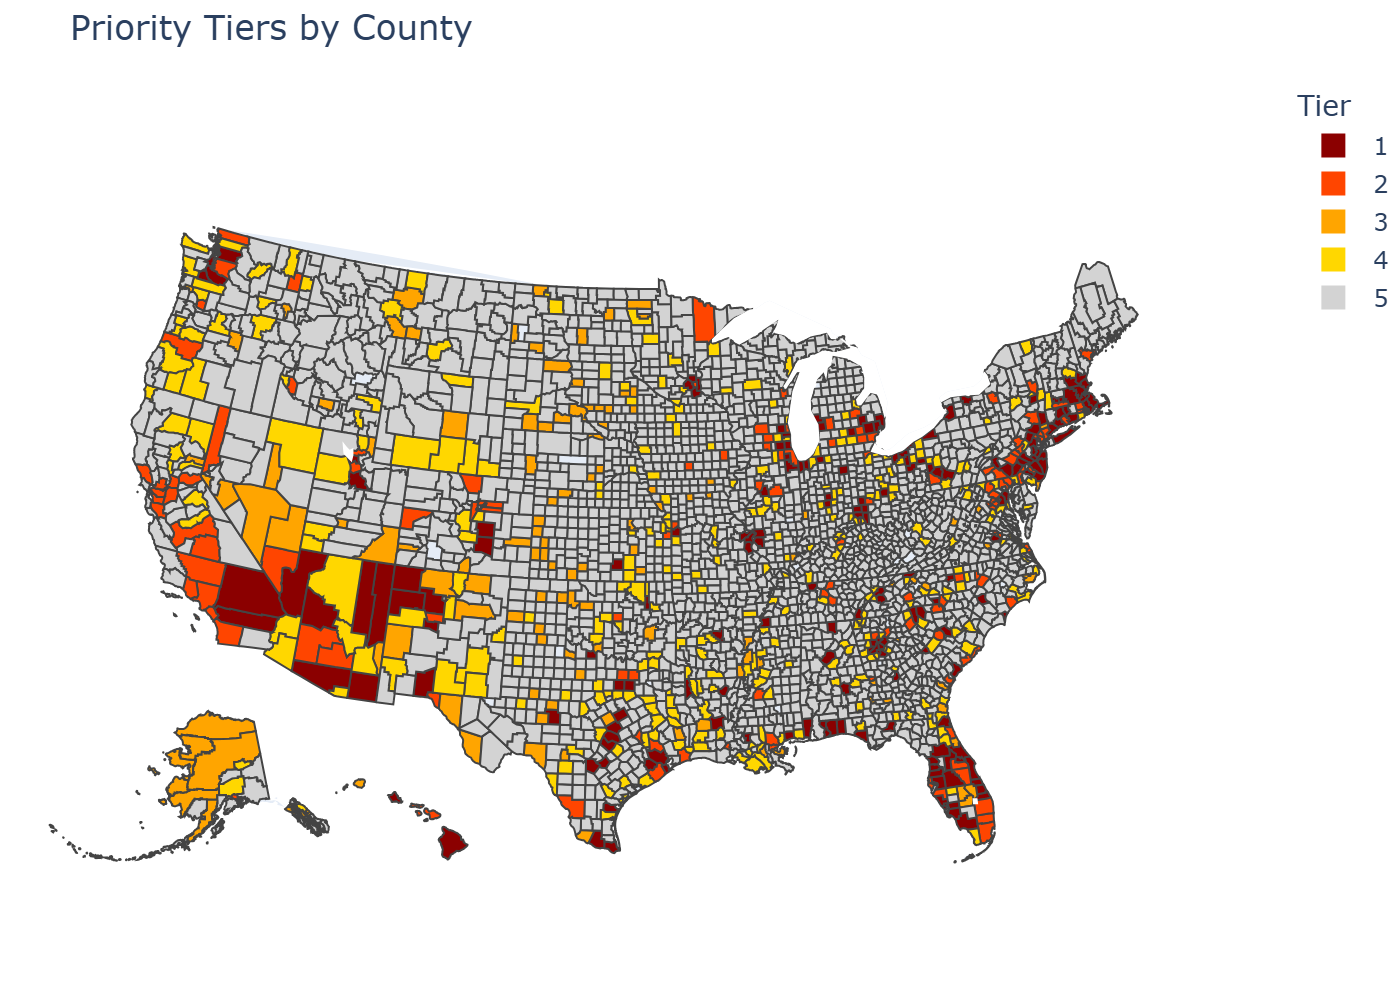

In [17]:
alpha_pop = 0.70     # prioritize number of people helped
alpha_rural = 0.25   # prioritize severity / rural vulnerability
cutoff_1 = 0.1
cutoff_2 = 0.3

# Running this function will calculate the priority scores and produce the map with the counties marked by tier
df = calculate_priority(df_access, alpha_pop, alpha_rural, cutoff_1, cutoff_2)

## 5. Analyzing Each Tier

The composition of each tier was analyzed, including the total number of people and counties in each tier, along with their demographic breakdown.

More than 40 million people are in Tiers 1-3, and an estimated 20-34 million people could be assisted by the implementation of this program, assuming a participation rate of 50%–85%, which is on par with SNAP.


In [18]:
print('Number of Counties per Tier: \n', df['Tier'].value_counts().sort_index())
print('\n')

tiers=[1, 2, 3, 4, 5]

print('Total Populations with Low Access by Tier')

for tier in tiers:
    df_t = df[df['Tier'] == tier]

    feature_val = df_t[pop_access_col].sum()

    print(f"Tier {tier}: {feature_val}")

tiers=[1, 2, 3]
top_three_tiers_population_sum = 0
for tier in tiers:
    df_t = df[df['Tier'] == tier]

    feature_val = df_t[pop_access_col].sum()

    top_three_tiers_population_sum += feature_val

print('\n')
print('Total Population in Tiers 1-3: ', top_three_tiers_population_sum)

Number of Counties per Tier: 
 Tier
1     182
2     128
3     128
4     330
5    2335
Name: count, dtype: int64


Total Populations with Low Access by Tier
Tier 1: 26031957.56762323
Tier 2: 13214905.827131245
Tier 3: 1235371.5987955783
Tier 4: 7776962.839240821
Tier 5: 11987473.596421508


Total Population in Tiers 1-3:  40482234.993550055


### Demographic Composition

A pie chart was used to compare the racial composition within each tier. Notably, Tier 3 has a larger proportion of American Indian/Alaska Natives compared to the other tiers. This may reflect the higher concentration of these populations in rural communities or on reservations.

In [19]:
def tiers_pie_chart(df, tiers, feature_cols, title, legend):

    n_tiers = len(tiers)

    nrows = 2
    ncols = 2

    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10))
    axes = axes.flatten()

    colors = plt.cm.tab20.colors[:len(feature_cols)]

    for ax, tier in zip(axes, tiers):
        df_t = df[df['Tier'] == tier]
        values = df_t[feature_cols].sum().values
        values = np.atleast_1d(values)

        total = values.sum()
        percentages = values / total * 100

        wedges, _ = ax.pie(
            values,
            startangle=90,
            colors=colors,
            labels=None,
            wedgeprops=dict(edgecolor="white")
        )

        for i, w in enumerate(wedges):
            pct = percentages[i]

            angle = (w.theta1 + w.theta2) / 2
            angle_rad = np.deg2rad(angle)

            x = np.cos(angle_rad)
            y = np.sin(angle_rad)

            # Draw lines to extend labels for smaller slices
            if pct < 0.5:
                r = 1.45
                draw_line = True
            elif pct <= 1.55:
                r = 1.3
                draw_line = True
            elif pct < 5:
                r = 1.1
                draw_line = True
            else:
                r = 0.65
                draw_line = False

            if draw_line:
                ax.annotate(
                    f"{pct:.2f}%",
                    xy=(x, y),
                    xytext=(r*x, r*y),
                    ha="center",
                    va="center",
                    fontsize=12,
                    arrowprops=dict(
                        arrowstyle="-",
                        lw=0.6,
                        alpha=0.7
                    )
                )
            else:
                ax.text(
                    0.65*x,
                    0.65*y,
                    f"{pct:.1f}%",
                    ha="center",
                    va="center",
                    fontsize=12
                )

        ax.set_title(f"Tier {tier}", fontsize=16)

    for j in range(len(tiers), len(axes)):
        axes[j].axis("off")

    fig.legend(
        legend,
        loc="upper right",
        bbox_to_anchor=(1.2, 1),
        frameon=False,
        fontsize=13
    )

    plt.suptitle(title, fontsize=20)
    plt.tight_layout()

    plt.savefig('./Plots/race_by_tier.png')
    plt.show()


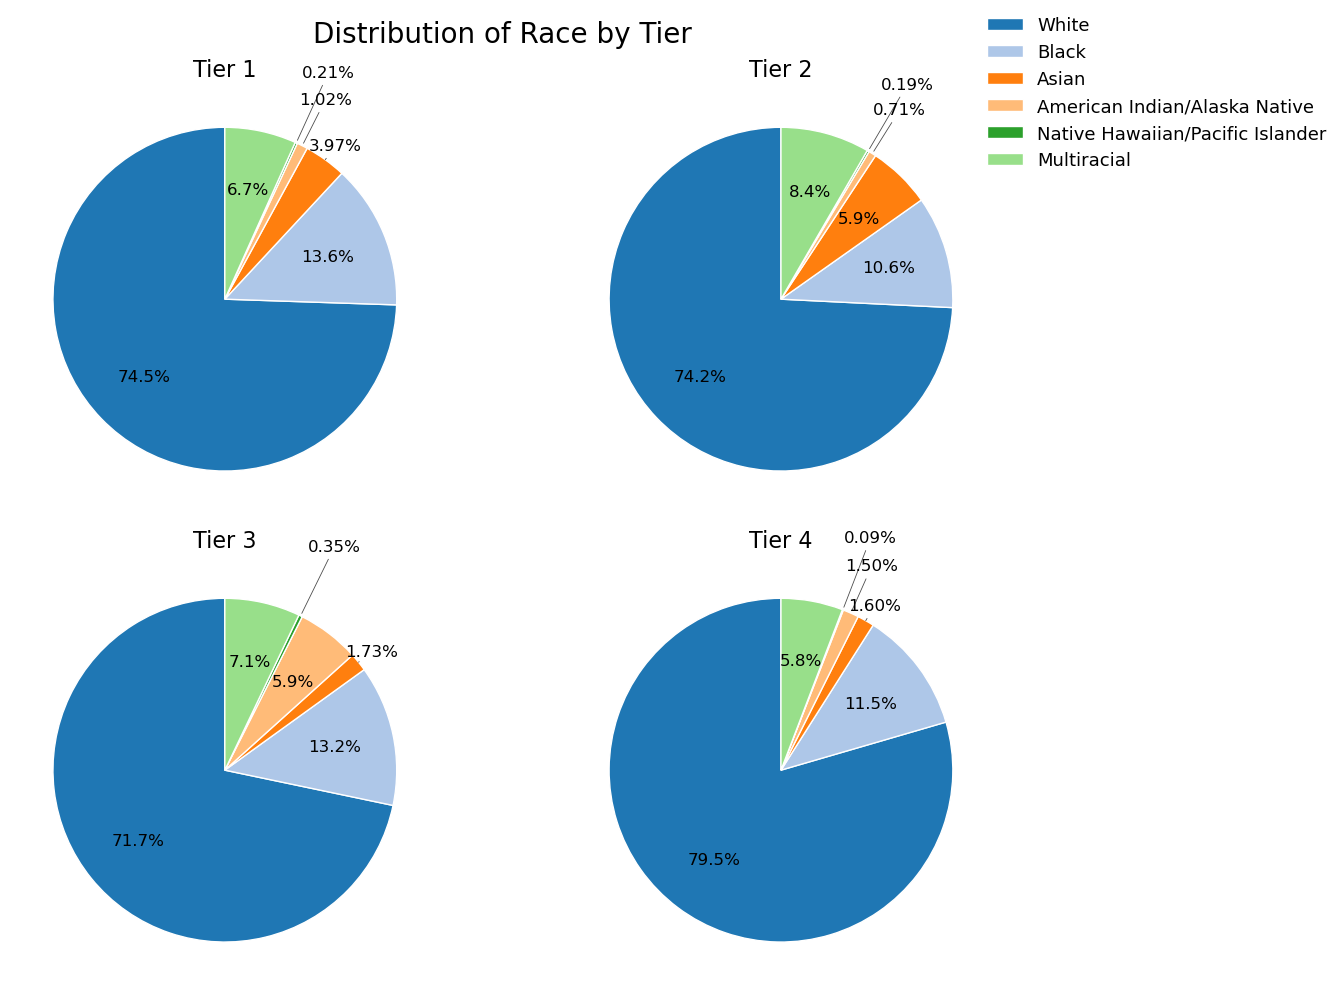

In [20]:
# Plotting a bar chart with distribution of race by tier

race_cols_count = [
    'LACCESS_WHITE15',
    'LACCESS_BLACK15',
    'LACCESS_NHASIAN15', 
    'LACCESS_NHNA15',
    'LACCESS_NHPI15',
    'LACCESS_MULTIR15'
]

legend_labels = ['White', 'Black', 'Asian', 'American Indian/Alaska Native', 'Native Hawaiian/Pacific Islander', "Multiracial"]

tiers_pie_chart(
    df=df,
    tiers=[1, 2, 3, 4],
    feature_cols=race_cols_count,
    title="Distribution of Race by Tier",
    legend=legend_labels
)

### Population Groups by Tier

A bar chart was used to visualize and compare the size of each population group across tiers. Low-income individuals, children, and seniors make up the largest numbers in all tiers. In Tier 1 specifically, there are over 7 million low-income individuals, 6.4 million children, and 3.2 million seniors with low access to food.

In [21]:
def tiers_bar_chart(df, tiers, feature_cols, legend_labels):

    tier_labels = [f"Tier {t}" for t in tiers]

    # Collect sums for each specified tier
    tier_values = []
    for t in tiers:
        df_t = df[df['Tier'] == t]
        sums = df_t[feature_cols].sum().values
        tier_values.append(sums)

    tier_values = np.array(tier_values)  
    n_tiers = len(tiers)
    n_features = len(feature_cols)
    x = np.arange(n_tiers)
    width = 0.8 / n_features  # bar width

    plt.figure(figsize=(12, 6))

    for i, feature in enumerate(feature_cols):
        plt.bar(x + i*width, tier_values[:, i], width=width, label=legend_labels[i])

    plt.xticks(x + ( width*(n_features-1)/2), tier_labels)
    plt.ylabel("Population")
    plt.xlabel("Tier")
    plt.title("Population Groups by Tier")
    plt.legend()

    plt.savefig('./Plots/population_groups.png')
    plt.show()



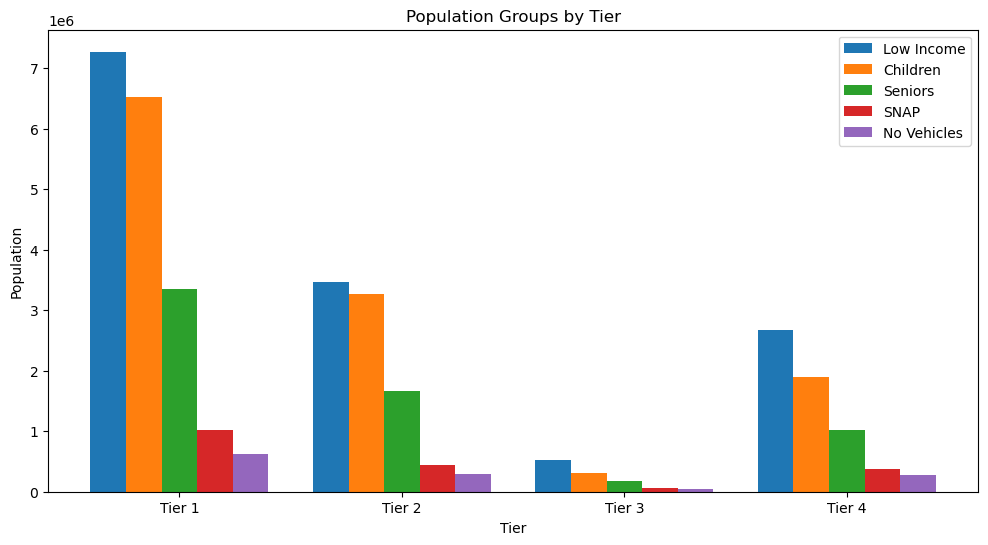

In [22]:
bar_cols = [
    "LACCESS_LOWI15", 
    "LACCESS_CHILD15", 
    "LACCESS_SENIORS15", 
    "LACCESS_SNAP15",
    "LACCESS_HHNV15"
]

legend = ['Low Income', 'Children', 'Seniors', 'SNAP', 'No Vehicles']

# Call the function to plot the tiers
tiers_bar_chart(
    df=df,
    tiers=[1, 2, 3, 4],
    feature_cols=bar_cols,
    legend_labels=legend,
)